### With Residual Gaussian (Normal) Error (Real-World Scenarios when some noise is assumed)

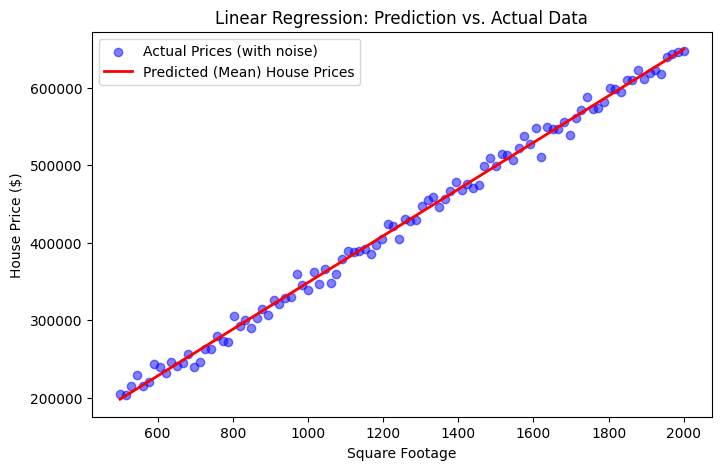

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating Data
np.random.seed(42)
X = np.linspace(500, 2000, 100)  # Square footage
y_true = 50000 + 300 * X  # True linear relationship
epsilon = np.random.normal(0, 10000, size=y_true.shape)  # Random noise
y_actual = y_true + epsilon  # Actual house prices with noise

# Train a simple linear regression model
from sklearn.linear_model import LinearRegression

X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y_actual)
y_pred = model.predict(X_reshaped)  # Predicted values

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y_actual, label="Actual Prices (with noise)", alpha=0.5, color='blue')
plt.plot(X, y_pred, label="Predicted (Mean) House Prices", color='red', linewidth=2)
plt.xlabel("Square Footage")
plt.ylabel("House Price ($)")
plt.title("Linear Regression: Prediction vs. Actual Data")
plt.legend()
plt.show()


### Without Residual Gaussian (Normal) Error (Rare in Real-World)

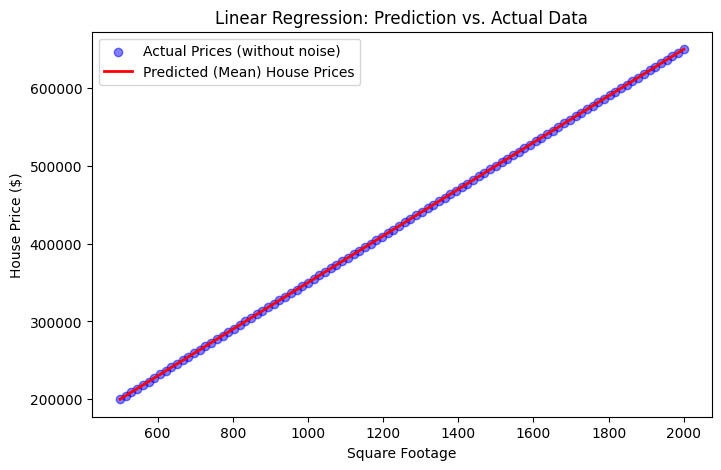

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating Data
np.random.seed(42)
X = np.linspace(500, 2000, 100)  # Square footage
y_true = 50000 + 300 * X  # True linear relationship
epsilon = np.random.normal(0, 10000, size=y_true.shape)  # Random noise
y_actual = y_true # Actual house prices without noise

# Train a simple linear regression model
from sklearn.linear_model import LinearRegression

X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y_actual)
y_pred = model.predict(X_reshaped)  # Predicted values

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y_actual, label="Actual Prices (without noise)", alpha=0.5, color='blue')
plt.plot(X, y_pred, label="Predicted (Mean) House Prices", color='red', linewidth=2)
plt.xlabel("Square Footage")
plt.ylabel("House Price ($)")
plt.title("Linear Regression: Prediction vs. Actual Data")
plt.legend()
plt.show()


#### MLE

In [8]:
# import numpy as np
# import scipy.stats as stats

# # Generate synthetic data from a normal distribution
# np.random.seed(42)
# data = np.random.normal(loc=5, scale=2, size=100)  # True mean = 5, std = 2

# # MLE estimates
# mu_mle = np.mean(data)  # MLE for mean
# sigma_mle = np.std(data, ddof=0)  # MLE for std (no Bessel correction)

# print(f"MLE Estimated Mean: {mu_mle}")
# print(f"MLE Estimated Standard Deviation: {sigma_mle}")

# # Compare with scipy MLE fit
# mu_fit, sigma_fit = stats.norm.fit(data)
# print(f"SciPy Estimated Mean: {mu_fit}, Standard Deviation: {sigma_fit}")


### House Price Prediction (Linear R

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Generate synthetic house price data
np.random.seed(42)
X = np.random.rand(100, 1) * 2000  # Square footage (100-2000 sqft)
true_beta0 = 50000  # True intercept
true_beta1 = 300  # True slope (price per sqft)
sigma_true = 10000  # True standard deviation of noise
epsilon = np.random.normal(0, sigma_true, size=(100, 1))  # Gaussian noise

# True House Price Model
y = true_beta0 + true_beta1 * X + epsilon


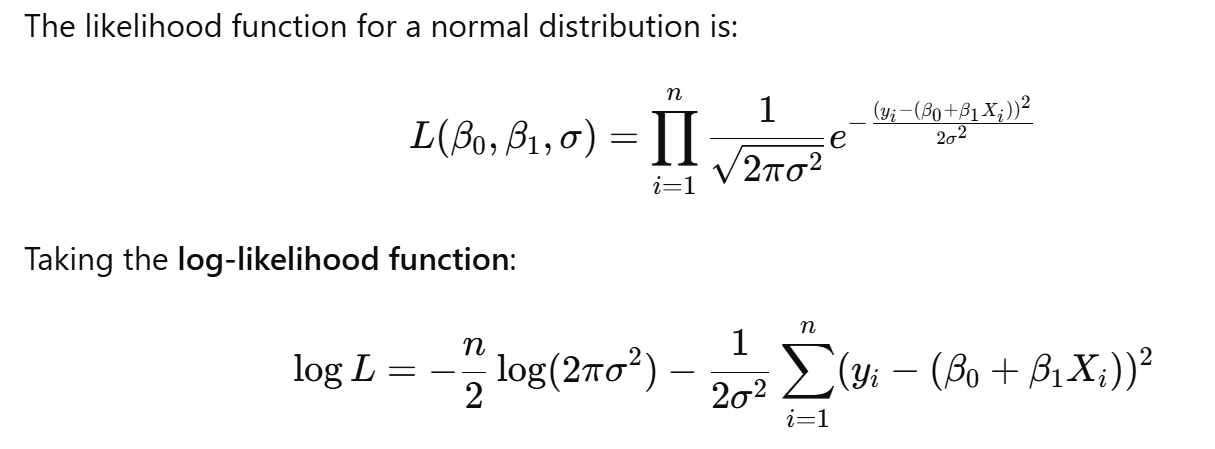

In [10]:
# Define the Negative Log-Likelihood Function
def negative_log_likelihood(params, X, y):
    beta0, beta1, sigma = params
    n = len(y)

    # Compute predicted values
    y_pred = beta0 + beta1 * X

    # Compute negative log-likelihood
    log_likelihood = -(-n/2 * np.log(2 * np.pi * sigma**2) - (1/(2 * sigma**2)) * np.sum((y - y_pred) ** 2))
    return log_likelihood


In [11]:
# Initial guess for parameters (beta0, beta1, sigma)
initial_params = [40000, 290, 9000]

# Perform optimization
result = minimize(negative_log_likelihood, initial_params, args=(X.flatten(), y.flatten()), method='L-BFGS-B', bounds=[(None, None), (None, None), (1e-3, None)])

# Extract estimated parameters
beta0_mle, beta1_mle, sigma_mle = result.x
print(f"MLE Estimated Beta0 (Intercept): {beta0_mle:.2f}")
print(f"MLE Estimated Beta1 (Slope): {beta1_mle:.2f}")
print(f"MLE Estimated Sigma (Std Dev): {sigma_mle:.2f}")


MLE Estimated Beta0 (Intercept): 52161.69
MLE Estimated Beta1 (Slope): 297.69
MLE Estimated Sigma (Std Dev): 8984.08


### Compare MLE with Ordinary Least Squares (OLS)
OLS is commonly used for linear regression, but it assumes Gaussian noise, making it mathematically equivalent to MLE.

In [12]:
# Fit OLS Regression
ols_model = LinearRegression()
ols_model.fit(X, y)
ols_beta0 = ols_model.intercept_[0]
ols_beta1 = ols_model.coef_[0, 0]

print(f"OLS Estimated Beta0 (Intercept): {ols_beta0:.2f}")
print(f"OLS Estimated Beta1 (Slope): {ols_beta1:.2f}")


OLS Estimated Beta0 (Intercept): 52150.96
OLS Estimated Beta1 (Slope): 297.70


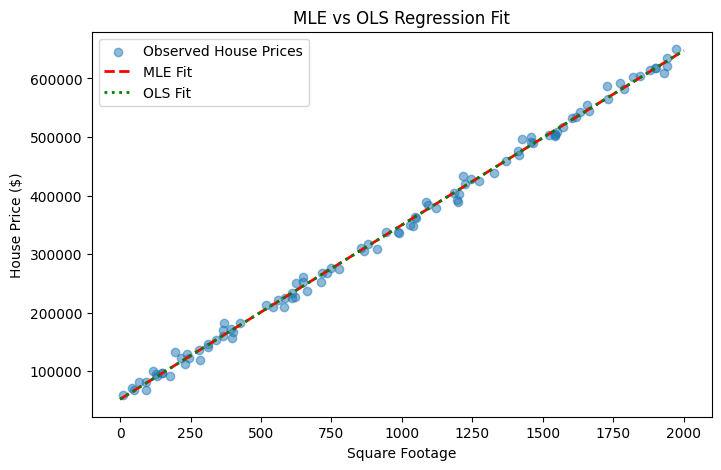

In [13]:
# Generate predictions
X_range = np.linspace(0, 2000, 100).reshape(-1, 1)
y_pred_mle = beta0_mle + beta1_mle * X_range
y_pred_ols = ols_beta0 + ols_beta1 * X_range

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, label="Observed House Prices", alpha=0.5)
plt.plot(X_range, y_pred_mle, label="MLE Fit", color='red', linestyle="--", linewidth=2)
plt.plot(X_range, y_pred_ols, label="OLS Fit", color='green', linestyle=":", linewidth=2)
plt.xlabel("Square Footage")
plt.ylabel("House Price ($)")
plt.title("MLE vs OLS Regression Fit")
plt.legend()
plt.show()


### MAP (Linear Regression)

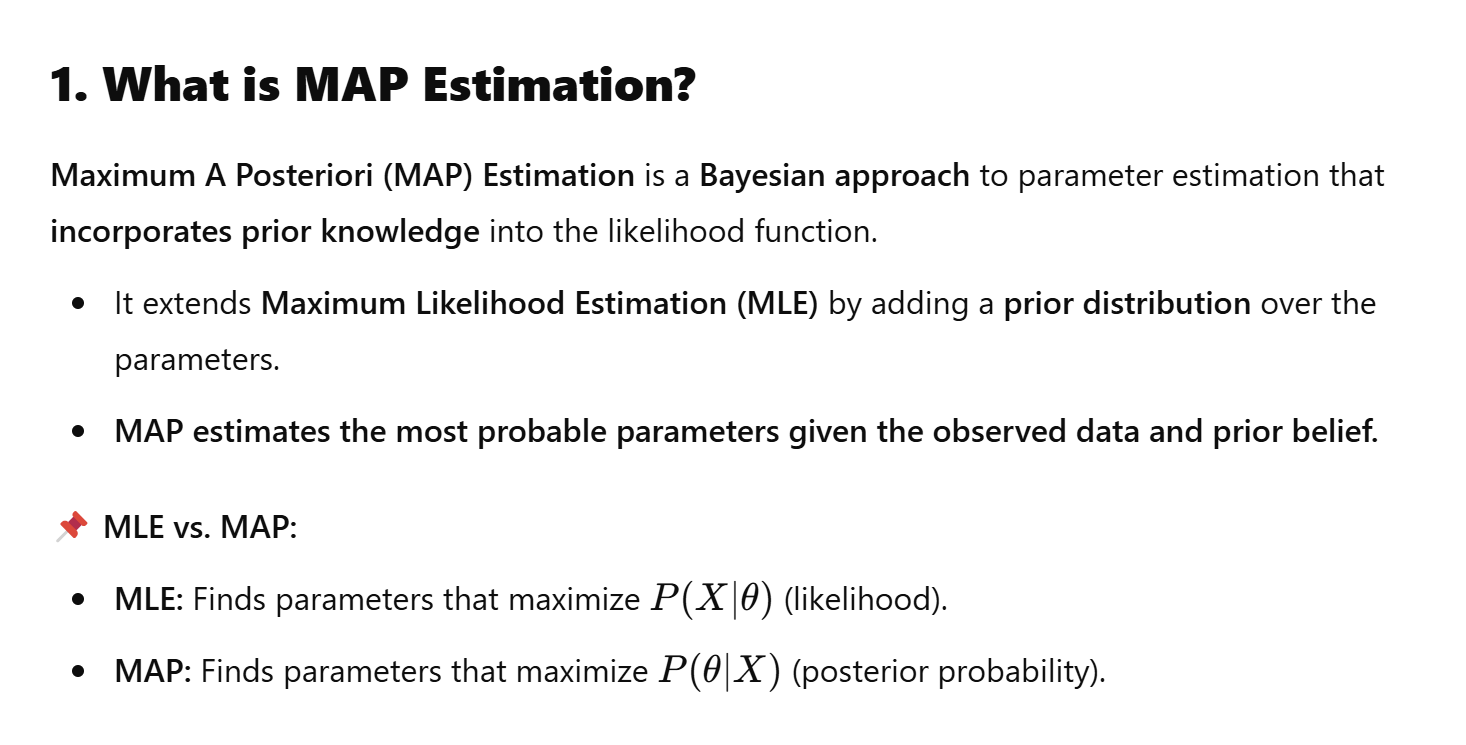

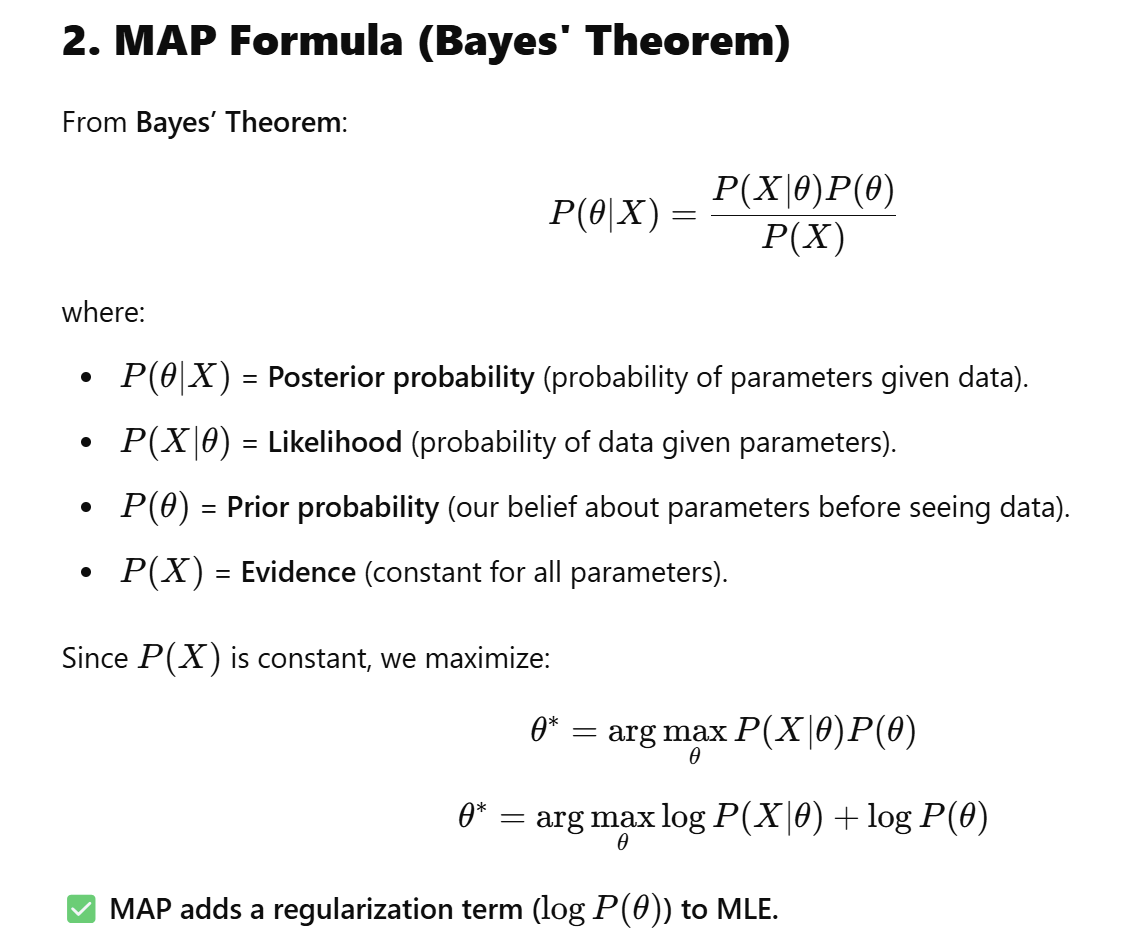

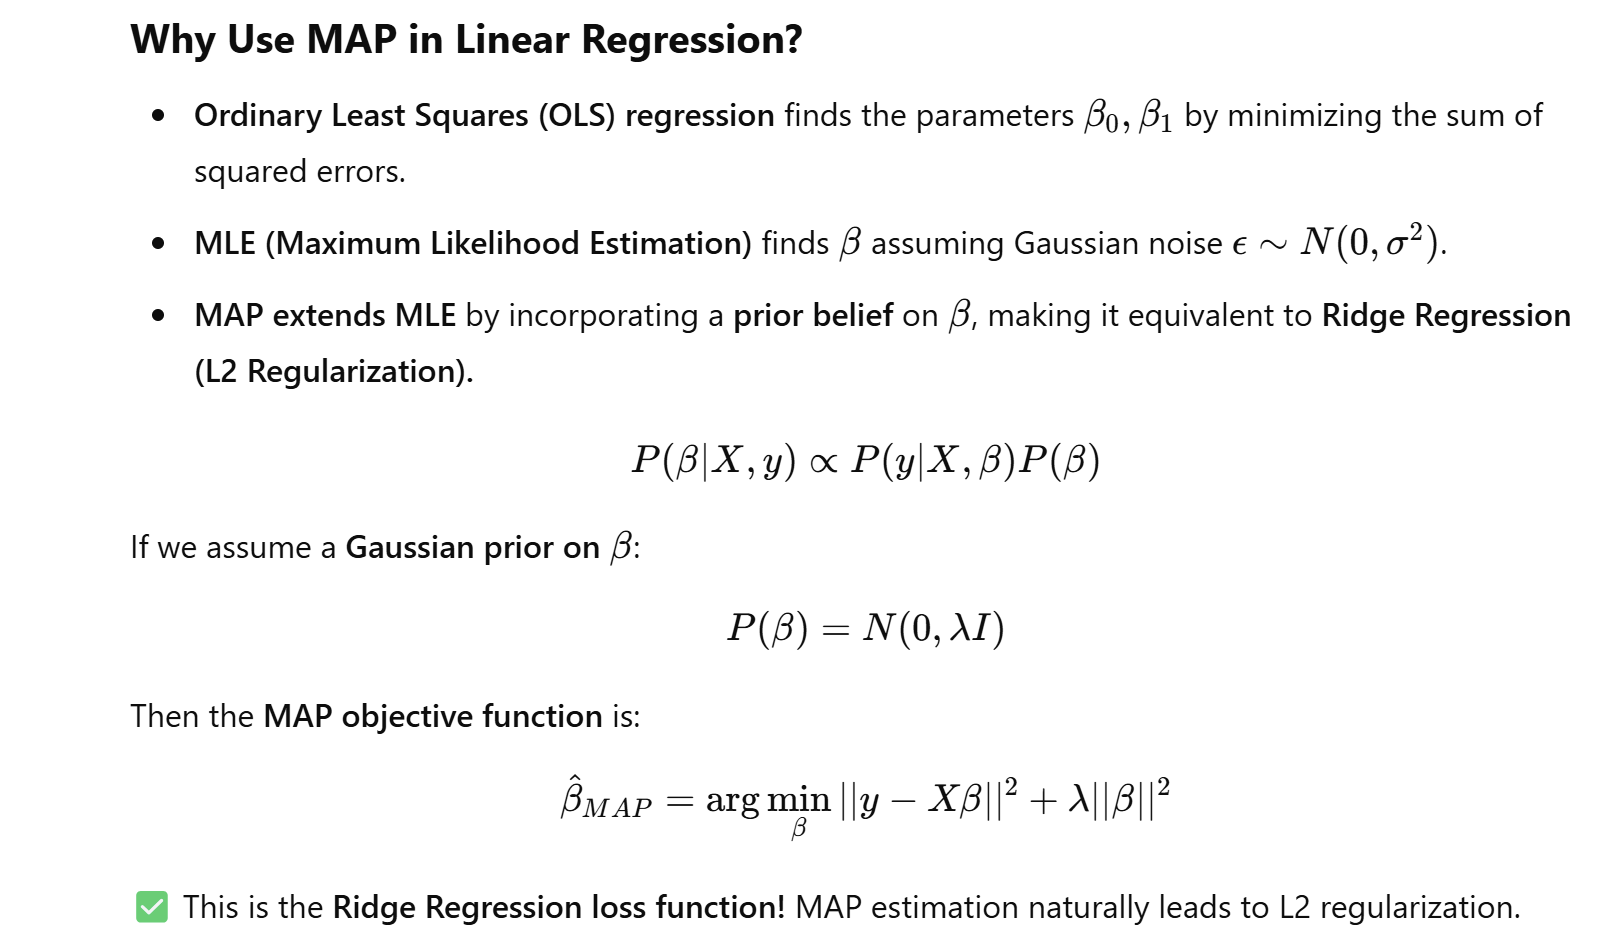

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Generate synthetic house price data
np.random.seed(42)
X = np.random.rand(100, 1) * 2000  # Square footage (100-2000 sqft)
true_beta0 = 50000  # True intercept
true_beta1 = 300  # True slope (price per sqft)
sigma_true = 10000  # True noise standard deviation
epsilon = np.random.normal(0, sigma_true, size=(100, 1))  # Gaussian noise

# True House Price Model
y = true_beta0 + true_beta1 * X + epsilon

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# MAP estimation (Ridge Regression with lambda = 100)
lambda_map = 100  # Prior strength (higher = stronger prior)
ridge_reg = Ridge(alpha=lambda_map)
ridge_reg.fit(X_train, y_train)

# Extract MAP estimates of parameters
beta0_map = ridge_reg.intercept_[0]
beta1_map = ridge_reg.coef_[0]

print(f"MAP Estimated Beta0 (Intercept): {beta0_map:.2f}")
print(f"MAP Estimated Beta1 (Slope): {beta1_map:.2f}")


MAP Estimated Beta0 (Intercept): 51430.16
MAP Estimated Beta1 (Slope): 297.99


In [17]:
# Comparison MLE vs MAP
print(f"MLE Estimated Beta0 (Intercept): {beta0_mle:.2f}")
print(f"MLE Estimated Beta1 (Slope): {beta1_mle:.2f}")
# print(f"MLE Estimated Sigma (Std Dev): {sigma_mle:.2f}")

MLE Estimated Beta0 (Intercept): 52161.69
MLE Estimated Beta1 (Slope): 297.69


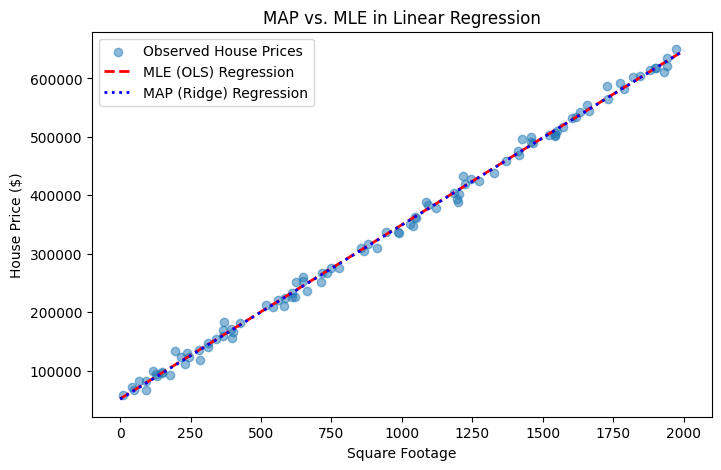

In [18]:
# Predictions
X_range = np.linspace(0, 2000, 100).reshape(-1, 1)
y_pred_mle = beta0_mle + beta1_mle * X_range
y_pred_map = beta0_map + beta1_map * X_range

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, label="Observed House Prices", alpha=0.5)
plt.plot(X_range, y_pred_mle, label="MLE (OLS) Regression", color='red', linestyle="--", linewidth=2)
plt.plot(X_range, y_pred_map, label="MAP (Ridge) Regression", color='blue', linestyle=":", linewidth=2)
plt.xlabel("Square Footage")
plt.ylabel("House Price ($)")
plt.title("MAP vs. MLE in Linear Regression")
plt.legend()
plt.show()


### MLE in Logistic Regression

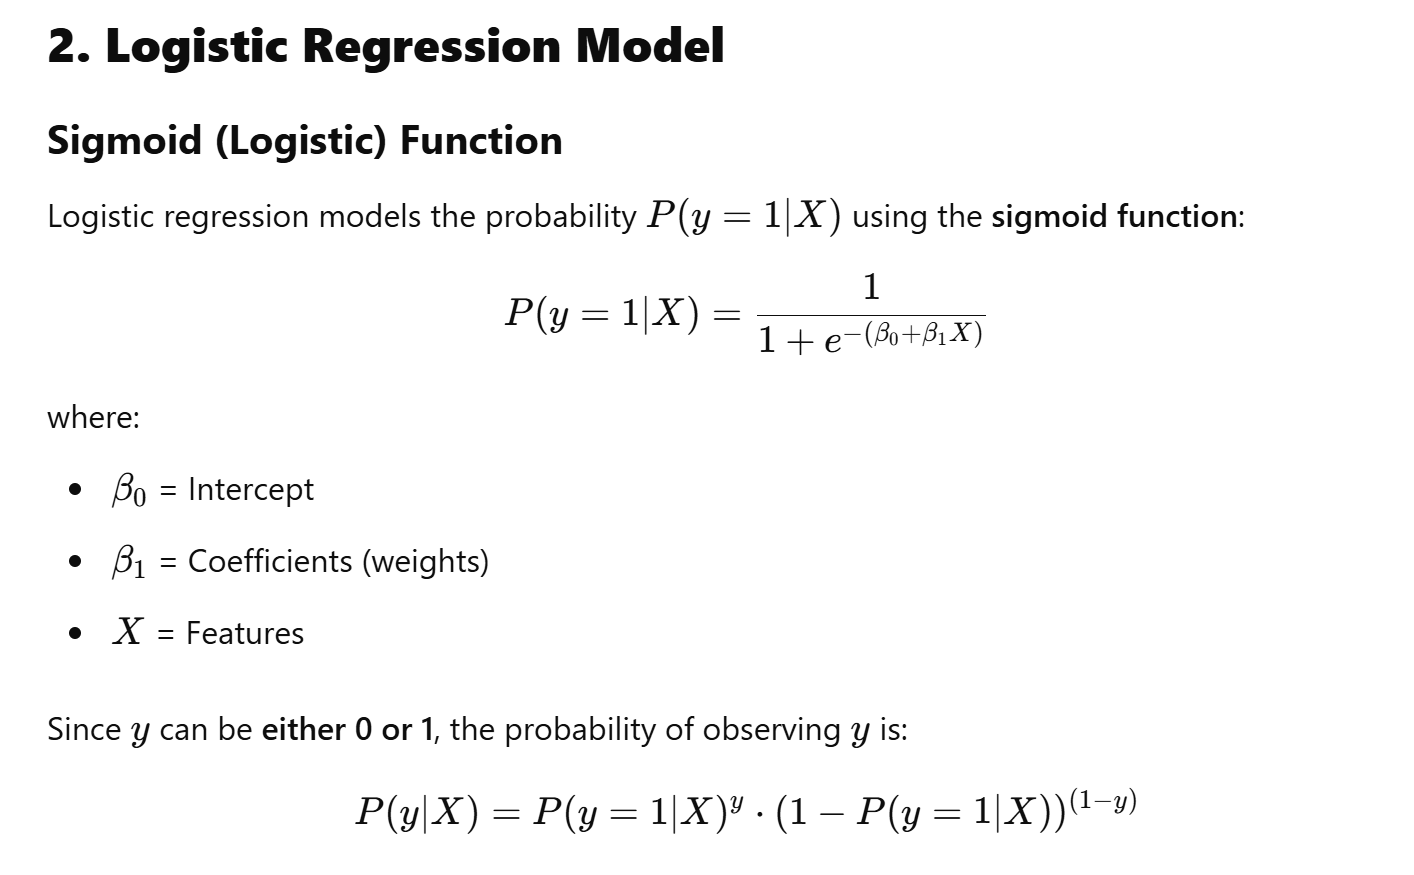

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Generate synthetic data (binary classification)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values (0 to 10)
true_beta0 = -4  # True intercept
true_beta1 = 1   # True slope
logits = true_beta0 + true_beta1 * X  # Linear combination
probabilities = 1 / (1 + np.exp(-logits))  # Apply sigmoid
y = (probabilities > 0.5).astype(int)  # Convert to binary labels (0 or 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


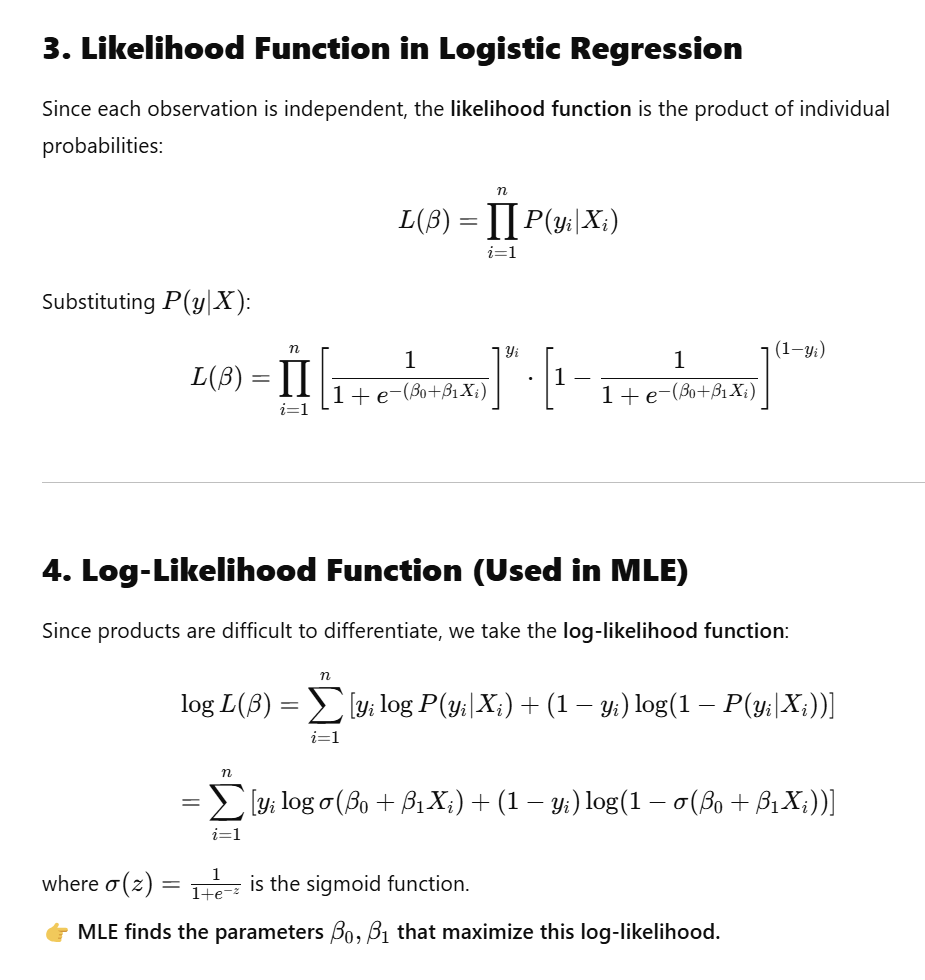

In [ ]:
# Define Negative Log-Likelihood Function
def neg_log_likelihood(params, X, y):
    beta0, beta1 = params
    logits = beta0 + beta1 * X
    prob = 1 / (1 + np.exp(-logits))  # Sigmoid function
    log_likelihood = np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob))
    return -log_likelihood  # We minimize negative log-likelihood


In [ ]:
# Initial parameter guess
initial_params = [0, 0]

# Perform optimization (MLE)
result = opt.minimize(neg_log_likelihood, initial_params, args=(X_train.flatten(), y_train.flatten()), method='BFGS')

# Extract estimated parameters
beta0_mle, beta1_mle = result.x
print(f"MLE Estimated Beta0 (Intercept): {beta0_mle:.2f}")
print(f"MLE Estimated Beta1 (Slope): {beta1_mle:.2f}")


MLE Estimated Beta0 (Intercept): -5518.22
MLE Estimated Beta1 (Slope): 1325.66


<ipython-input-18-e4393c050ed9>:6: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob))
<ipython-input-18-e4393c050ed9>:6: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob))
<ipython-input-18-e4393c050ed9>:5: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-logits))  # Sigmoid function
<ipython-input-18-e4393c050ed9>:6: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob))
<ipython-input-18-e4393c050ed9>:6: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob))
<ipython-input-18-e4393c050ed9>:5: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-logits))  # Sigmoid function
<ipython-input-18-e4393c050ed9>:5: RuntimeWarning: overflow encountered in exp
  prob = 1 / 

In [ ]:
# Compute predicted probabilities using MLE parameters
logits_test = beta0_mle + beta1_mle * X_test
probabilities_test = 1 / (1 + np.exp(-logits_test))
y_pred = (probabilities_test > 0.5).astype(int)  # Convert probabilities to binary classes

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


<ipython-input-20-ea375b10055a>:3: RuntimeWarning: overflow encountered in exp
  probabilities_test = 1 / (1 + np.exp(-logits_test))


###MAP in Logistic Regression

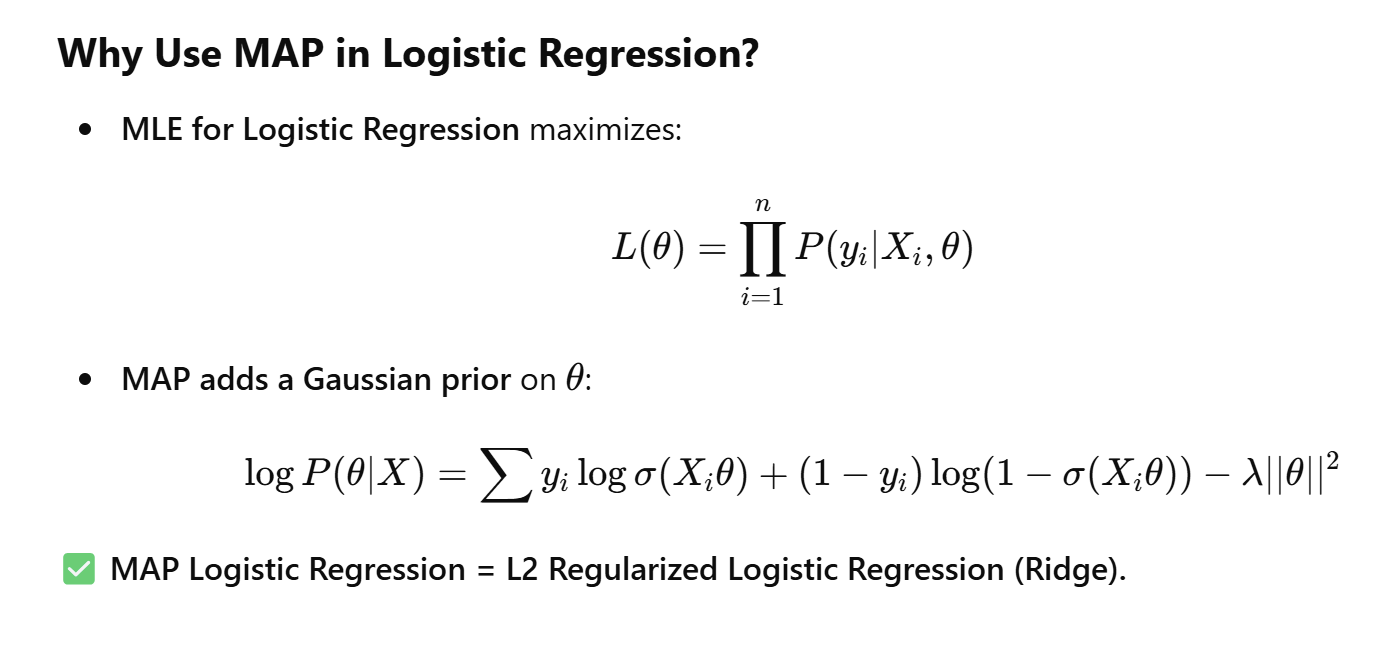

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic binary classification data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression

# MAP estimation (L2 Regularization)
lambda_map = 0.1  # Prior strength
log_reg_map = LogisticRegression(penalty='l2', C=1/lambda_map, solver='lbfgs')
log_reg_map.fit(X_train, y_train)

# Extract MAP parameters
beta_map = log_reg_map.coef_[0]
beta0_map = log_reg_map.intercept_[0]

print(f"MAP Estimated Coefficients: {beta_map}")
print(f"MAP Estimated Intercept: {beta0_map:.2f}")


MAP Estimated Coefficients: [ 2.19732605 -0.21721754]
MAP Estimated Intercept: -0.13


In [26]:
# MLE Logistic Regression (No Regularization)
log_reg_mle = LogisticRegression(penalty=None, solver='lbfgs')  # No regularization
log_reg_mle.fit(X_train, y_train)

beta_mle = log_reg_mle.coef_[0]
beta0_mle = log_reg_mle.intercept_[0]

print(f"MLE Estimated Coefficients: {beta_mle}")
print(f"MLE Estimated Intercept: {beta0_mle:.2f}")


MLE Estimated Coefficients: [ 2.22242311 -0.22151925]
MLE Estimated Intercept: -0.13


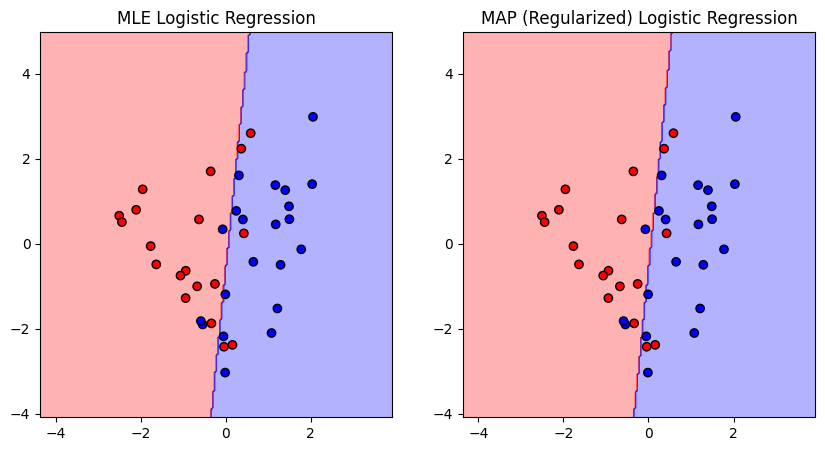

In [27]:
from matplotlib.colors import ListedColormap
import numpy as np

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict on mesh grid
Z_map = log_reg_map.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_mle = log_reg_mle.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot MAP boundary
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.contourf(xx, yy, Z_mle, alpha=0.3, cmap=ListedColormap(["red", "blue"]))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(["red", "blue"]), edgecolor="k")
plt.title("MLE Logistic Regression")

# Plot MAP boundary
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z_map, alpha=0.3, cmap=ListedColormap(["red", "blue"]))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(["red", "blue"]), edgecolor="k")
plt.title("MAP (Regularized) Logistic Regression")

plt.show()
